In [2]:
# Import the necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load the Spotify Dataset
# Here we're assuming you've already downloaded the dataset as 'SpotifyFeatures.csv'
df = pd.read_csv('dataset.csv')

# Let's take a look at the first few rows of the dataset
print(df.head())


   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [3]:
# Step 2: Select the relevant features for clustering
# We are focusing on numerical features that describe songs
features = ['danceability', 'energy', 'tempo', 'loudness', 'valence']

# Extract these features from the dataset
X = df[features]

# Check out the selected features
print(X.head())


   danceability  energy    tempo  loudness  valence
0         0.676  0.4610   87.917    -6.746    0.715
1         0.420  0.1660   77.489   -17.235    0.267
2         0.438  0.3590   76.332    -9.734    0.120
3         0.266  0.0596  181.740   -18.515    0.143
4         0.618  0.4430  119.949    -9.681    0.167


In [4]:
# Step 3: Standardize the features
# K-means algorithm is sensitive to the scale of the data, so we standardize it (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Let's check the standardized values for the first 5 songs
print(pd.DataFrame(X_scaled, columns=features).head())


   danceability    energy     tempo  loudness   valence
0      0.629244 -0.717148 -1.141863  0.300828  0.929306
1     -0.845908 -1.889980 -1.489717 -1.784744 -0.798690
2     -0.742186 -1.122669 -1.528312 -0.293288 -1.365688
3     -1.733304 -2.312994  1.987859 -2.039252 -1.276974
4      0.295030 -0.788711 -0.073348 -0.282750 -1.184403


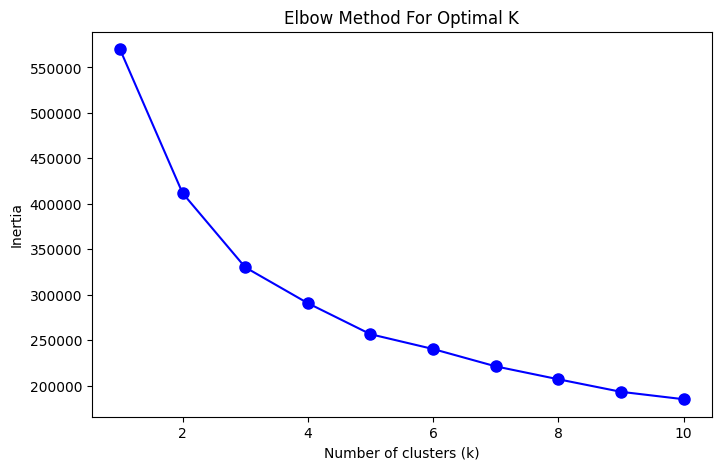

In [5]:
# Step 4: Use the Elbow Method to find the optimal number of clusters (k)
# We will calculate the inertia for different values of k (from 1 to 10) to identify the best k

inertia = []  # This will store the "inertia" (how well the clusters fit the data) for each k
k_range = range(1, 11)  # We will try k values from 1 to 10

# Loop over each k and calculate the K-means clustering
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Step 5: Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [6]:
# Step 6: Fit K-means++ with the optimal number of clusters
# Let's assume from the Elbow graph that the best k is 4
optimal_k = 4

# Apply K-means++ algorithm
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# The labels for each song (which cluster they belong to)
labels = kmeans.labels_

# Let's see the cluster labels assigned to the first 10 songs
print(labels[:10])


[1 2 0 2 0 1 2 1 1 0]


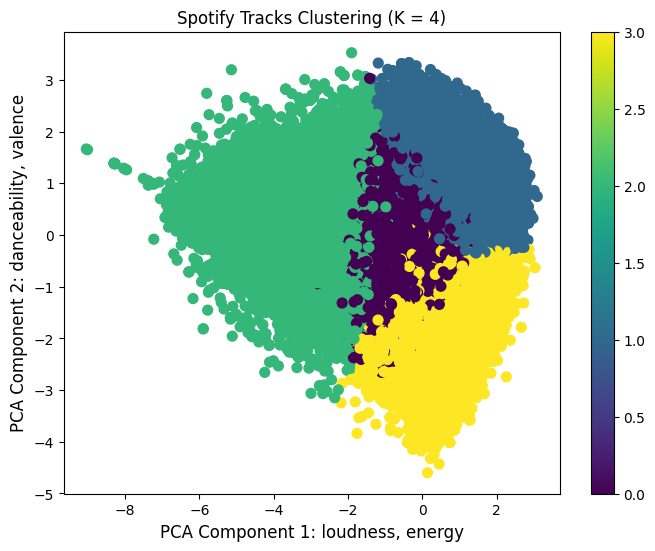

In [10]:
# Step 7: Visualize the clusters using PCA (since we can't visualize high-dimensional data)
# We reduce the dimensions from 5 features to 2, so we can plot it
import numpy as np
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
loading_scores = pca.components_.T
top_features_component_1 = ', '.join([features[i] for i in np.argsort(loading_scores[:, 0])[-2:][::-1]])
top_features_component_2 = ', '.join([features[i] for i in np.argsort(loading_scores[:, 1])[-2:][::-1]])

# Step 8: Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title(f'Spotify Tracks Clustering (K = {optimal_k})')
plt.xlabel(f'PCA Component 1: {top_features_component_1}', fontsize=12)
plt.ylabel(f'PCA Component 2: {top_features_component_2}', fontsize=12)
plt.colorbar()
plt.show()
